# IMT 573 - Lab 7 - Regression

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

Name: Pratiibh Bassi

Collaborators: 

In this module, we have focused on statistical modeling. In this lab, you'll explore the concept of regression model using the same baseball data as the previous lab. As a refresher, baseball is a bat-and-ball sport played in countries around the world including the United States, Canada, Cuba, the Dominican Republic, and Japan, to name a few. Baseball is a played between two teams who take turns batting and fielding. The objective of the game is to score "runs" by getting on "bases" with either "hits" or "walks". A run is scored when a player advances around the bases and returns to home plate. You can learn more [here](https://en.wikipedia.org/wiki/Baseball).

We will use the same dataset of baseball game statistics from 2010-2013 as the previous lab. You can learn more about the dataset at www.retrosheet.org/.

In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

### Problem 1: Set up data

What is the relationship between the number of at-bats a team gets and the number of runs they score over the course of an entire baseball season? This is the question we will explore in this lab. 

#### (a) Import data

To begin, load the data found in the `GL2010.TXT`, `GL2011.TXT`, `GL2012.TXT`, `GL2013.TXT` into a single dataframe. You can find column names for the data in the `cnames.txt` file. You should ultimately have 9,720 rows of data.

In [10]:
data_files = ['GL2010.TXT', 'GL2011.TXT', 'GL2012.TXT', 'GL2013.TXT']
column_file = 'cnames.txt'

In [12]:
columns = pd.read_csv('cnames.txt')

In [14]:
data = pd.concat(pd.read_csv(d, header = None) for d in data_files)
data.columns = columns.Name

In [16]:
data.head()

Name,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,...,152,153,154,155,156,157,158,159,160,161
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,A.J. Pierzynski,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y
3,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,Yuniesky Betancourt,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y
4,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,Mark Ellis,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y


In [18]:
data.shape

(9720, 161)

#### (b) Pull years

For this exercise, we need data for each team (30 in total) for each season in the dataset (4 seasons). Each season is designated by the year in which the games were played, which can be pulled from the `Date` variable. Start by creating a `Year` variable.

In [22]:
data_edited = data.copy()
data_edited['Year'] = data_edited['Date'].astype(str).str.slice(0, 4)

In [24]:
data_edited.head()

Name,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,...,153,154,155,156,157,158,159,160,161,Year
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y,2010
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y,2010
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y,2010
3,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y,2010
4,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y,2010


#### (c) Aggregate data

Next, aggregate the scores and at-bats for each team across each season. Note that we do not make a distinction between home team and away team. You should have 120 records after aggregating (one for each team for each season).

In [28]:
data_home = data_edited[['Date', 'Home', 'Hat-bats', 'HomeScore', 'Year']].copy()
data_away = data_edited[['Date', 'Visitor', 'Vat-bats', 'VisitorScore', 'Year']].copy()

In [30]:
data_home.shape

(9720, 5)

In [48]:
data_home.columns = ['Date', 'Team', 'AtBats', 'Score', 'Year']
data_away.columns = ['Date', 'Team', 'AtBats', 'Score', 'Year']

In [50]:
data_for_reg = pd.concat([data_home, data_away])

In [52]:
data_for_reg.head()

,Date,Team,AtBats,Score,Year
0,20100404,BOS,34,9,2010
1,20100405,ANA,33,6,2010
2,20100405,CHA,28,6,2010
3,20100405,KCA,35,4,2010
4,20100405,OAK,28,3,2010


In [54]:
data_for_reg.shape

(19440, 5)

In [56]:
data_for_reg.describe()

,Date,AtBats,Score
count,1.944000e+04,19440.000000,19440.000000
mean,2.011567e+07,34.073045,4.289506
std,1.118064e+04,4.418290,3.013582
min,2.010040e+07,16.000000,0.000000
25%,2.010800e+07,31.000000,2.000000
50%,2.012033e+07,33.000000,4.000000
75%,2.013035e+07,36.000000,6.000000
max,2.013093e+07,71.000000,22.000000


In [58]:
data_for_reg.head()

,Date,Team,AtBats,Score,Year
0,20100404,BOS,34,9,2010
1,20100405,ANA,33,6,2010
2,20100405,CHA,28,6,2010
3,20100405,KCA,35,4,2010
4,20100405,OAK,28,3,2010


In [60]:
data_for_reg = data_for_reg.groupby(['Team', 'Year'])[['AtBats', 'Score']].sum()
data_for_reg.shape

(120, 2)

In [62]:
data_for_reg.describe()

,AtBats,Score
count,120.000000,120.000000
mean,5519.833333,694.900000
std,74.456387,73.053497
min,5386.000000,513.000000
25%,5455.000000,643.250000
50%,5518.000000,699.000000
75%,5564.750000,743.500000
max,5735.000000,875.000000


### Problem 2: Regression

#### (a) Plot relationship

Plot the relationship between runs and at-bats. Does the relationship look linear? Describe the
relationship between these two variables.

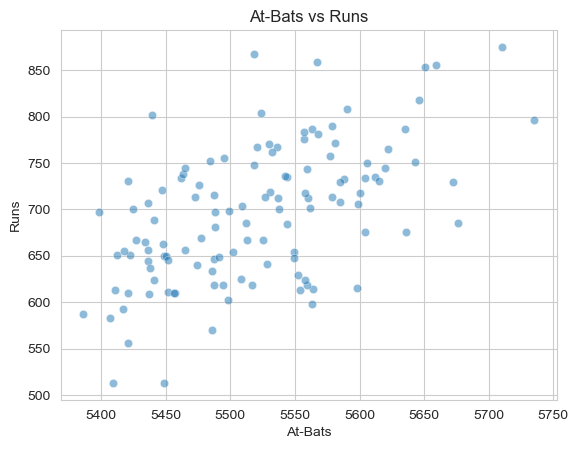

In [64]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data_for_reg, x = 'AtBats', y = 'Score', alpha = 0.5)
ax.set_title('At-Bats vs Runs');
ax.set_xlabel('At-Bats');
ax.set_ylabel('Runs');

After plotting the data, we can see that there does seem to be a relationship between at-bats and runs.  We find that runs does increase as at bats increase.  A linear model will likely work well, however, there does seem to be variability in the relationship as seen in the dispersed points.

#### (b) Assessing relationship

If you knew a team’s at bats, would you be comfortable using a linear model to predict the number of
runs? Why or why not? Quantify the strength of the relationship with the correlation coefficient. Discuss what you find.

In [ ]:
data_for_reg.head()

In [67]:
data_for_reg[['AtBats', 'Score']].corr()

,AtBats,Score
AtBats,1.000000,0.559262
Score,0.559262,1.000000


While a linear model would likely be a good model for this data, there is variability.  In predicting runs from at-bats I would want to report an interval estaimte, rather than a point estaimte, to capture this uncertainty.  We find that the observed correlation in this dataset between runs and at bats is 0.56, which is a relatively strong relationship.

#### (c) Modeling

Use the `statsmodels` package to fit a simple linear model for runs as a function of at-bats. Ensure a constant (intercept) has been added to the regression. Write down the formula for the model, filling in estimated coefficient values.

In [71]:
data_for_reg.head()

AtBats  Score
Team Year               
ANA  2010    5488    681
     2011    5513    667
     2012    5536    767
     2013    5588    733
ARI  2010    5473    713

In [73]:
import statsmodels.api as sm

In [75]:
data_for_reg.head()

AtBats  Score
Team Year               
ANA  2010    5488    681
     2011    5513    667
     2012    5536    767
     2013    5588    733
ARI  2010    5473    713

In [77]:
data_for_reg.shape

(120, 2)

In [81]:
x = sm.add_constant(data_for_reg[['AtBats']])
y = data_for_reg[['Score']].copy()

In [85]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     53.70
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           3.15e-11
Time:                        20:12:49   Log-Likelihood:                -662.21
No. Observations:                 120   AIC:                             1328.
Df Residuals:                     118   BIC:                             1334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2333.9660    413.345     -5.647      0.0

Runs = -2333.97 + 0.5487 * AtBats

#### (d) Interpretation

Describe in words the interpretation of $\beta$<sub>1</sub>.

For a unit increase in at-bats, there is a corresponding 0.5487 increase in runs.

### Problem 3: Plotting

#### (a) Plot regression line

Make a plot of at-bats vs runs but include the fitted regression line. How well does the fitted line fit the data?

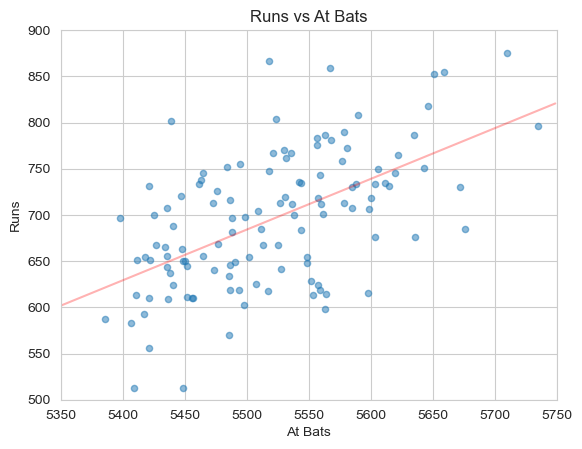

In [92]:
sns.set_style('whitegrid')
ax = data_for_reg.plot(x='AtBats', y='Score', kind='scatter', alpha = 0.5)

x =range(5350, 5750)
ax.plot(x, results.params.const + results.params.AtBats * x, color = 'red', alpha = 0.3)

ax.set_title('Runs vs At Bats');
ax.set_xlabel('At Bats')
;ax.set_ylabel('Runs');

ax.set_xlim(5350, 5750);
ax.set_ylim(500, 900);

#### (b) Plot residuals

Make a plot of the residuals versus at bats. Is there any apparent pattern in the residuals plot?

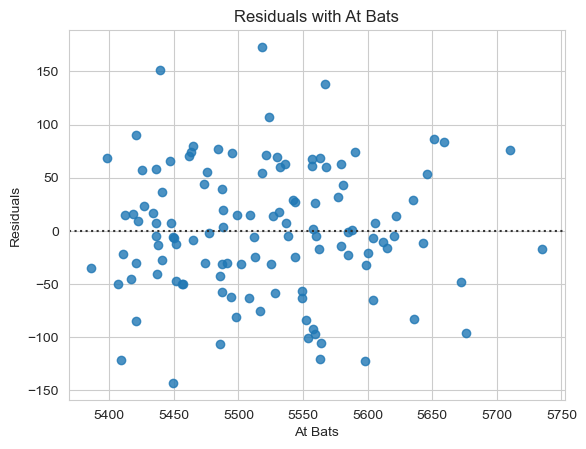

In [94]:
residuals = results.resid

ax = sns.residplot(x= 'AtBats', y = residuals, data = data_for_reg)

ax.set_title('Residuals with At Bats');
ax.set_xlabel('At Bats');
ax.set_ylabel('Residuals');

There is no strong pattern in the residuals.  The residuals have approximately mean zero and constant variance.  The residual plots are not perfect, but no immediate pattern is evident.